In [28]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

In [29]:
# VARIABLES

sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'

# Wikidata requires a user agent header to prevent spam requests
user_agent = 'Paintings_conference_bot/0.0 (https://github.com/Pgxe9zu1/catalogue-003; lisa.sommer@stud.hs-hannover.de)'

# SPARQL query
# see in Wikidata's Query Service GUI at:
# https://www.wikidata.org/wiki/Q162111
query = """
#defaultView:ImageGrid
SELECT DISTINCT ?painting ?title ?creator ?creatorLabel ?inceptionyear ?material ?materialLabel ?image ?inventory_number ?inventory_numberLabel ?copyright_status ?copyright_statusLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". }
  ?painting wdt:P195 wd:Q162111;
    ((wdt:P31?)/(wdt:P279*)) wd:Q3305213;
    p:P186 _:b34.
  _:b34 ps:P186 ?material;
    pq:P518 wd:Q861259.
  ?painting wdt:P18 ?image;
    wdt:P1476 ?title;
    wdt:P170 ?creator;
    wdt:P571 ?inception.
  BIND(YEAR(?inception) AS ?inceptionyear)
  ?painting wdt:P6216 ?copyright_status;
    p:P217 _:b35.
  _:b35 ps:P217 ?inventory_number;
    pq:P195 wd:Q162111.
}
LIMIT 9
"""


In [30]:
# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)


Title: Dachauerin mit Kind

Wikidata link: [http://www.wikidata.org/entity/Q18689477](http://www.wikidata.org/entity/Q18689477)

Creator: Wilhelm Leibl

Year: 1873

Material: Paneel

Inventory number: A I 824

Copyright: Gemeinfreiheit



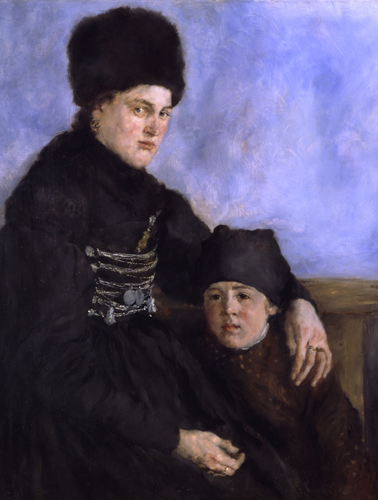




Title: Der Sänger Francisco d'Andrade als Don Giovanni in Mozarts Oper

Wikidata link: [http://www.wikidata.org/entity/Q18688179](http://www.wikidata.org/entity/Q18688179)

Creator: Max Slevogt

Year: 1912

Material: Leinwand

Inventory number: A II 36

Copyright: Gemeinfreiheit



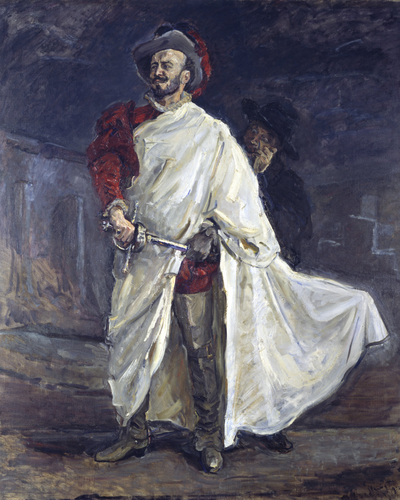




Title: Flachsscheuer in Laren

Wikidata link: [http://www.wikidata.org/entity/Q18688178](http://www.wikidata.org/entity/Q18688178)

Creator: Max Liebermann

Year: 1887

Material: Leinwand

Inventory number: A I 431

Copyright: Gemeinfreiheit



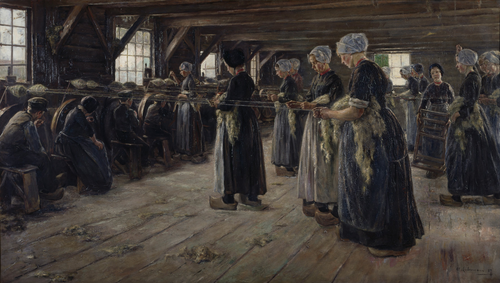




Title: Frau und Söhnchen des Künstlers

Wikidata link: [http://www.wikidata.org/entity/Q18688360](http://www.wikidata.org/entity/Q18688360)

Creator: Philipp Otto Runge

Year: 1807

Material: Leinwand

Inventory number: A II 755

Copyright: Gemeinfreiheit



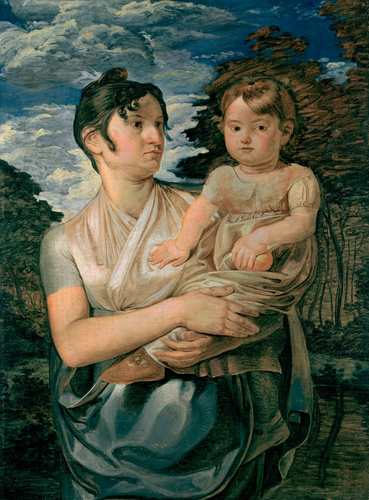




Title: Auf dem Kanapee

Wikidata link: [http://www.wikidata.org/entity/Q18689478](http://www.wikidata.org/entity/Q18689478)

Creator: Wilhelm Trübner

Year: 1872

Material: Leinwand

Inventory number: A I 645

Copyright: Gemeinfreiheit



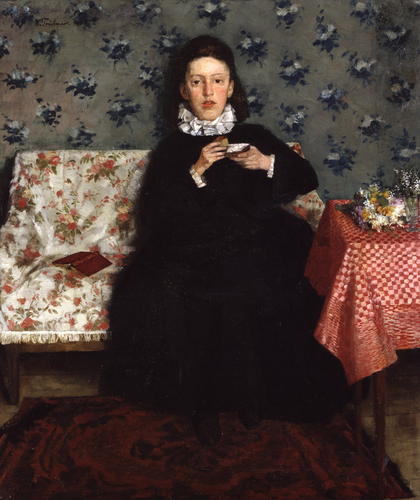




Title: Le Moulin sur la Couleuvre à Pontoise

Wikidata link: [http://www.wikidata.org/entity/Q18688308](http://www.wikidata.org/entity/Q18688308)

Creator: Paul Cézanne

Year: 1881

Material: Leinwand

Inventory number: A I 606

Copyright: Gemeinfreiheit



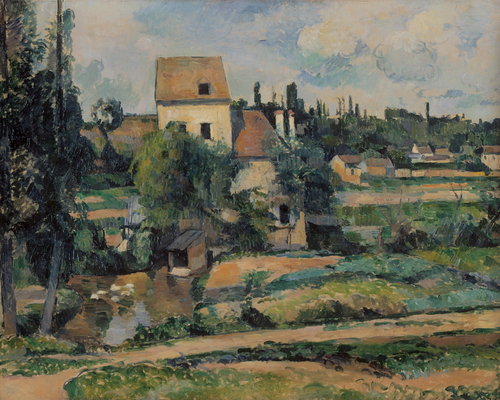




Title: Fleurs dans un pot de gingembre et fruits

Wikidata link: [http://www.wikidata.org/entity/Q18688310](http://www.wikidata.org/entity/Q18688310)

Creator: Paul Cézanne

Year: 1888

Material: Leinwand

Inventory number: A I 965

Copyright: Gemeinfreiheit



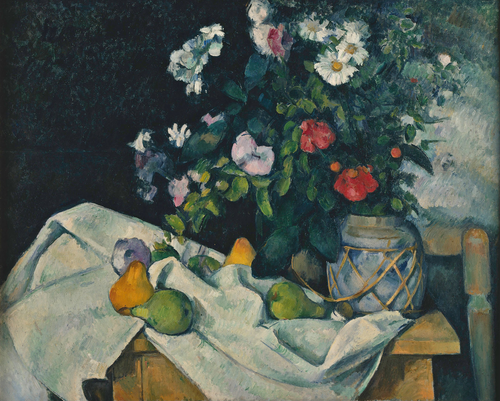




Title: Rosa Straße mit Auto

Wikidata link: [http://www.wikidata.org/entity/Q19883652](http://www.wikidata.org/entity/Q19883652)

Creator: Ernst Ludwig Kirchner

Year: 1913

Material: Leinwand

Inventory number: A II 318

Copyright: Gemeinfreiheit



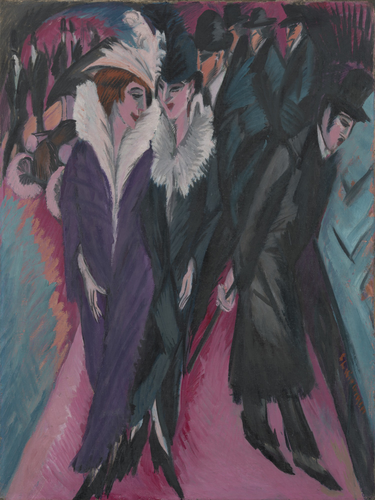




Title: Kreuzgang am Dom zu Halberstadt

Wikidata link: [http://www.wikidata.org/entity/Q19915165](http://www.wikidata.org/entity/Q19915165)

Creator: Carl Hasenpflug

Year: 1836

Material: Leinwand

Inventory number: W.S. 75

Copyright: Gemeinfreiheit



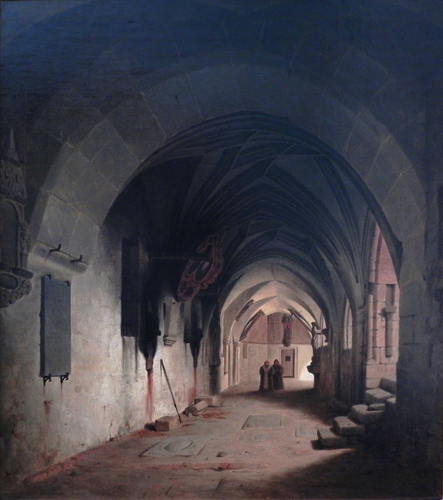

In [31]:
# MAIN PROGRAM

# create SPARQL query
sparql = SPARQLWrapper(sparql_endpoint_url, agent=user_agent)

# retrieve results and convert to JSON format
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

# for each result, print various data fields
for painting in result['results']['bindings']:
    print('Title: ' + painting['title']['value'] + '\n')
    print('Wikidata link: ' + '[' + painting['painting']['value'] + ']' + '(' + painting['painting']['value'] + ')' + '\n')
    print('Creator: ' + painting['creatorLabel']['value'] + '\n')
    print('Year: ' + painting['inceptionyear']['value'] + '\n')
    print('Material: ' + painting['materialLabel']['value'] + '\n')
    print('Inventory number: ' + painting['inventory_number']['value'] + '\n')
    print('Copyright: ' + painting['copyright_statusLabel']['value'] + '\n')
    
    
    # get image from image URL and display resized version
    image_url=painting['image']['value']
    headers = {'User-Agent': 'Ex_Books_conference_bot/0.0 (https://github.com/Pgxe9zu1/catalogue-003; lisa.sommer@stud.hs-hannover.de)'}
    im = get_image(image_url, headers)
    im.thumbnail((500, 500), Image.Resampling.LANCZOS)
    display(im)
    print('\n\n')